In [27]:
import cv2
from ultralytics import YOLO
import math
import numpy as np
import os

In [3]:
def render_text(frame, label, x1, y1, c2):
    cv2.rectangle(frame, (x1, y1), c2, (255, 0, 0), -1)
    cv2.putText(frame, label, (x1, y1 - 2), 0, 0.5, [255, 255, 255], thickness=1, lineType=cv2.LINE_AA)

In [71]:
model = YOLO("yolov8n-pose")
classNames = ['person']
cap = cv2.VideoCapture("Sahel.mp4")
    
while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    results = model.track(frame, persist=True)
    
    for r in results:
        boxes = r.boxes
        keypoints = r.keypoints
            
        for box, keypoints in zip(boxes, keypoints):
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = math.ceil((box.conf[0]*100))/100
            cls = int(box.cls[0])
            track_id = int(box.id[0])
                
            if cls == 0 and conf > 0.5:
                label = f'{track_id}:person {conf}'
                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    
                t_size = cv2.getTextSize(label, 0, fontScale=0.5, thickness=1)[0]
                c2 = x1 + t_size[0], y1 - t_size[1] - 3
                render_text(frame, label, x1, y1, c2)
                    
                for k1, k2 in keypoints.xy[0]:
                    cv2.circle(frame, (int(k1), int(k2)), radius=2, color=(0, 255, 0), thickness=-1)
                    
    cv2.imshow('frame', frame)
        
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()



0: 384x640 (no detections), 150.1ms
Speed: 20.3ms preprocess, 150.1ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 97.3ms
Speed: 0.0ms preprocess, 97.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 91.4ms
Speed: 2.3ms preprocess, 91.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 80.2ms
Speed: 2.7ms preprocess, 80.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 76.5ms
Speed: 0.0ms preprocess, 76.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 72.8ms
Speed: 1.6ms preprocess, 72.8ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 74.8ms
Speed: 2.2ms preprocess, 74.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 80.9ms
Speed: 1.7ms preprocess, 80.9

## Extract Keypoints

In [72]:
len(results[0].keypoints.xy[0])

0

In [73]:
results[0].keypoints.xy[0]

tensor([], size=(0, 2))

In [78]:
pose = np.array([results[0].keypoints.xy[0]]).flatten() if len(results[0].keypoints.xy[0])!=0 else np.zeros(34)
print (pose.shape)

(34,)


In [75]:
pose

array([], dtype=float32)

In [79]:
def extract_keypoints(results):
    pose = np.array([results[0].keypoints.xy[0]]).flatten() if len(results[0].keypoints.xy[0])!=0 else np.zeros(34)
    
    return pose

In [80]:
extract_keypoints(results).shape

(34,)

## Setup Data path

In [33]:
DATA_PATH = os.path.join(os.getcwd(),'YOLO_Data')

os.makedirs(os.path.join(DATA_PATH))

In [34]:
DATA_PATH

'c:\\Users\\sahel\\Projects\\Action Recognition\\Skeletal based action recognition\\yolov8 + LSTM\\YOLO_Data'

In [35]:
no_sequences = 20
sequence_length = 25
start_folder = 0

In [36]:
actions = np.array(['run', 'walk'])

In [37]:
for action in actions: 
    os.makedirs(os.path.join(DATA_PATH,action))
    
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    
    for sequence in range(0,no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Collecting training data

In [81]:
model = YOLO("yolov8n-pose")
classNames = ['person']
for action in actions:
        # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
            
        if action == 'run':
            video_path="dataset/"+action+"/r"+str(sequence+1)+".mp4"
        if action == 'walk':
            video_path="dataset/"+action+"/w"+str(sequence+1)+".mp4"
        
        cap = cv2.VideoCapture(video_path)
        
        for frame_num in range(sequence_length):
            ret, frame = cap.read()
            if not ret:
                break
                
            results = model.track(frame, persist=True)
            
            for r in results:
                boxes = r.boxes
                keypoints = r.keypoints
                    
                for box, keypoints in zip(boxes, keypoints):
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = math.ceil((box.conf[0]*100))/100
                    cls = int(box.cls[0])
                    try: 
                        track_id = int(box.id[0])
                    except:
                        track_id=1
                    print("track_id: ",track_id)
                    if cls == 0 and conf > 0.5:
                        label = f'{track_id}:person {conf}'
                        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                            
                        t_size = cv2.getTextSize(label, 0, fontScale=0.5, thickness=1)[0]
                        c2 = x1 + t_size[0], y1 - t_size[1] - 3
                        render_text(frame, label, x1, y1, c2)
                            
                        for k1, k2 in keypoints.xy[0]:
                            cv2.circle(frame, (int(k1), int(k2)), radius=2, color=(0, 255, 0), thickness=-1)
                            
            cv2.putText(frame, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                 
            cv2.imshow('frame', frame)
                
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break

cap.release()
cv2.destroyAllWindows()


0: 640x640 1 person, 120.1ms
Speed: 5.0ms preprocess, 120.1ms inference, 19.0ms postprocess per image at shape (1, 3, 640, 640)
track_id:  1

0: 640x640 1 person, 150.6ms
Speed: 6.0ms preprocess, 150.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
track_id:  1

0: 640x640 1 person, 120.6ms
Speed: 6.0ms preprocess, 120.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
track_id:  1

0: 640x640 1 person, 105.3ms
Speed: 5.0ms preprocess, 105.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
track_id:  1

0: 640x640 1 person, 106.6ms
Speed: 5.0ms preprocess, 106.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
track_id:  1

0: 640x640 1 person, 108.7ms
Speed: 5.0ms preprocess, 108.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
track_id:  1

0: 640x640 1 person, 105.5ms
Speed: 4.0ms preprocess, 105.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
track_id:  1

0: 640x640 

In [53]:
cap.release()
cv2.destroyAllWindows()

##  Preprocess Data and Create Labels and Features

In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [56]:
label_map = {label:num for num, label in enumerate(actions)}

In [82]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [83]:
sequences

[[array([     306.69,      134.62,      307.41,      132.32,           0,           0,      313.43,      132.67,           0,           0,      322.41,      144.95,      321.51,      144.38,      329.18,      162.78,      324.39,       162.6,       320.8,      176.87,      316.93,      173.84,      327.68,      183.98,
              327.14,      183.07,      322.45,       214.5,      321.82,      213.36,      330.24,      240.97,      327.36,      238.62], dtype=float32),
  array([     298.36,      136.06,      299.32,      133.51,           0,           0,      304.83,      133.53,           0,           0,      314.33,      144.61,      308.34,      147.07,      327.78,         163,      311.31,      163.72,      322.94,       179.2,      303.84,      175.18,      320.52,      183.04,
              316.22,      184.89,      319.22,      208.66,      309.21,      214.42,      341.96,      230.03,      324.02,      236.44], dtype=float32),
  array([      292.8,       134.3,      294.58

In [84]:
np.array(sequences).shape

(40, 25, 34)

In [85]:
np.array(labels).shape

(40,)

In [86]:
X = np.array(sequences)
X.shape

(40, 25, 34)

In [87]:
y = to_categorical(labels).astype(int)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [90]:
y_test.shape
y_test

array([[1, 0],
       [1, 0]])

## Build and Train LSTM Neural Network

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import Callback

In [92]:
log_dir = os.path.join(os.getcwd(),'Logs')

os.makedirs(log_dir)
tb_callback = TensorBoard(log_dir=log_dir)

In [93]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(25,34)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [94]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy','categorical_crossentropy'])

In [95]:
class MyThresholdCallback(Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["categorical_accuracy"]
        if accuracy >= self.threshold:
            self.model.stop_training = True
callback=MyThresholdCallback(threshold=0.95)

In [122]:
%%time
#history=model.fit(X_train, y_train, epochs=500, callbacks=[callback])

history=model.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 20ms/step - loss: 1.0349 - categorical_accuracy: 0.8947 - categorical_crossentropy: 1.0349
Epoch 2/500
2/2 [==============================] - 0s 21ms/step - loss: 0.1722 - categorical_accuracy: 0.9737 - categorical_crossentropy: 0.1722
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 1.1741 - categorical_accuracy: 0.8684 - categorical_crossentropy: 1.1741
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 2.1433 - categorical_accuracy: 0.7895 - categorical_crossentropy: 2.1433
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 0.0682 - categorical_accuracy: 0.9737 - categorical_crossentropy: 0.0682
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 0.4165 - categorical_accuracy: 0.9211 - categorical_crossentropy: 0.4165
Epoch 7/500
2/2 [==============================] - 0s 21ms/step - loss: 0.1961 - categorical_accuracy: 0.9474 - categorical_crosse

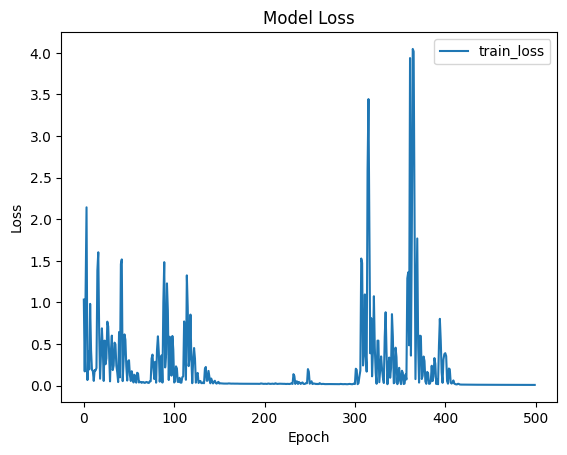

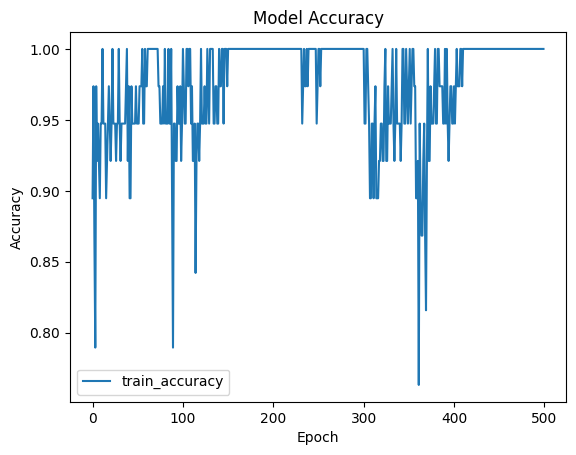

In [123]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['categorical_accuracy'], label='train_accuracy')
#plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [124]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 64)            25344     
                                                                 
 lstm_1 (LSTM)               (None, 25, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 179874 (702.63 KB)
Trainable params: 17987

In [125]:
res = model.predict(X_train)

2/2 [==============================] - 0s 13ms/step


In [126]:
actions[np.argmax(res[3])]

'run'

## Save Weights

In [127]:
actions[np.argmax(y_test[1])]

'run'

In [128]:
import h5py
model.save('action.h5')

C:\Users\sahel\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [129]:
del model

In [130]:
from keras import models    
model = models.load_model('action.h5')

## Evaluation of the model

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [132]:
yhat = model.predict(X_train)

2/2 [==============================] - 1s 16ms/step


In [133]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [134]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[20,  0],
        [ 0, 18]],

       [[18,  0],
        [ 0, 20]]], dtype=int64)

In [135]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[20,  0],
        [ 0, 18]],

       [[18,  0],
        [ 0, 20]]], dtype=int64)

In [136]:
accuracy_score(ytrue, yhat)

1.0